# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

# Import API key
import api_keys

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Mount Pleasant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=mount pleasant
Processing Record 2 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=rikitea
Processing Record 3 | Muroto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=muroto
Processing Record 4 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=san patricio
Processing Record 5 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=srednekolymsk
Processing Record 6 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=hilo
Processing Record 7 | Constitucion
http://api.openweathermap.org/data

City not found. Skipping...
Processing Record 57 | Senanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=senanga
Processing Record 58 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=tuatapere
City not found. Skipping...
Processing Record 59 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=grindavik
City not found. Skipping...
Processing Record 60 | Rome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=roma
Processing Record 61 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=dikson
Processing Record 62 | Moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=moerai
Processing Record 63 | Kolyvan
http://api.openweathermap.org/data/

Processing Record 113 | Arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=arman
Processing Record 114 | Tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=tiznit
Processing Record 115 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=klaksvik
City not found. Skipping...
City not found. Skipping...
Processing Record 116 | Kisanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=kisanga
Processing Record 117 | Koulamoutou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=koulamoutou
Processing Record 118 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=butaritari
Processing Record 119 | Najran
http://api.openweathermap.org/data/2.5/weathe

Processing Record 168 | High Prairie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=high prairie
Processing Record 169 | Pindwara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=pindwara
Processing Record 170 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=isangel
Processing Record 171 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=bandarbeyla
City not found. Skipping...
Processing Record 172 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=touros
Processing Record 173 | Kushima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=kushima
Processing Record 174 | Benguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

City not found. Skipping...
Processing Record 223 | Ust-Nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=ust-nera
Processing Record 224 | Saraland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=saraland
Processing Record 225 | Sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=sambava
Processing Record 226 | Marshall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=marshall
Processing Record 227 | Saint-Francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=saint-francois
Processing Record 228 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=bathsheba
Processing Record 229 | Malanje
http://api.openweathermap.org/data/2.5/weather?units=Imper

City not found. Skipping...
Processing Record 278 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=ilulissat
Processing Record 279 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=taoudenni
Processing Record 280 | Oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=oktyabrskoye
Processing Record 281 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=rocha
City not found. Skipping...
Processing Record 282 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=codrington
Processing Record 283 | Fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=fare
Processing Record 284 | Mahebourg
http://api.openweathermap.org/data/2.5

Processing Record 333 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=longyearbyen
Processing Record 334 | Newport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=newport
Processing Record 335 | Ampanihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=ampanihy
Processing Record 336 | Gasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=gasa
Processing Record 337 | Dzhubga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=dzhubga
Processing Record 338 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=lebu
Processing Record 339 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=te anau

Processing Record 388 | Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=sur
Processing Record 389 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=aykhal
Processing Record 390 | Yibin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=yibin
Processing Record 391 | Tuzha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=tuzha
Processing Record 392 | Caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=caravelas
Processing Record 393 | Houma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=houma
Processing Record 394 | Kihei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=kihei
Processing Record 395

Processing Record 444 | Tadine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=tadine
Processing Record 445 | Magadi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=magadi
Processing Record 446 | Laibin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=laibin
City not found. Skipping...
Processing Record 447 | Wagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=wagar
Processing Record 448 | Orangeburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=orangeburg
Processing Record 449 | Kalabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=kalabo
Processing Record 450 | Skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df1

City not found. Skipping...
Processing Record 499 | Isernia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=isernia
Processing Record 500 | Loei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=loei
Processing Record 501 | Birao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=birao
Processing Record 502 | Casablanca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=casablanca
Processing Record 503 | Manicore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=manicore
Processing Record 504 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16f9f7f1bc7714a0&q=broome
Processing Record 505 | Zadonsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7af6773cd27b08df16

In [7]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display data frame head 
weather_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Output_CSV/weather_data.csv'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Max_Temp_vs_Latitude.png'

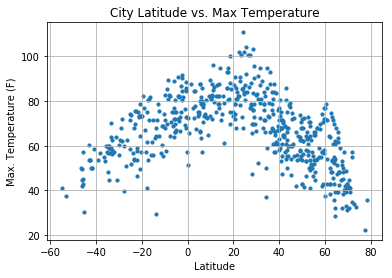

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Humidity_vs_Latitude.png'

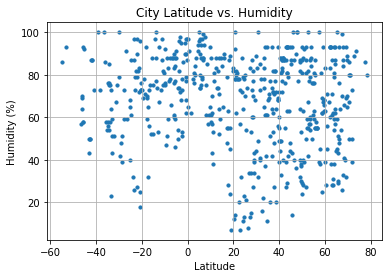

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Cloudiness_vs_Latitude.png'

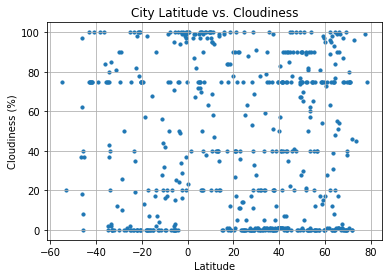

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Wind_Speed_vs_Latitude.png'

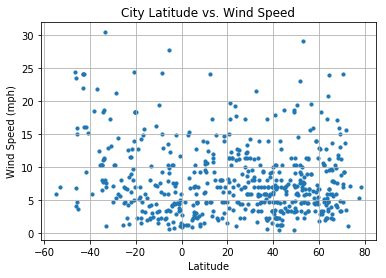

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()